# Gaussian Formula

$$
f(x)= a e^{-\left(\frac{(x-b)^2}{2c^2})\right)}
$$
where for our purposes, $b=0$

In [2]:
import numpy as np
import matplotlib.pyplot as plt


## confirm Gauss Function

In [3]:
def gauss(x, a=1, b=0, c=1):
    expnt = -((x-b)**2)/(2*c**2)
    return a*np.exp(expnt)

In [4]:
from scipy.stats import norm

Need normalization factor of $\frac{1}{\sqrt{2\pi}}$

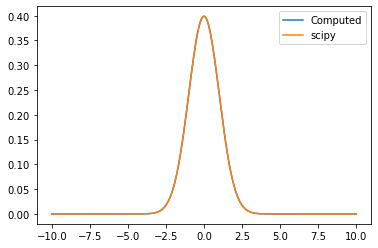

In [5]:
x = np.linspace(-10, 10, 1000)
y = gauss(x, a=np.sqrt(1/(2*np.pi)))
xnorm = norm.pdf(x)

fig, ax = plt.subplots()
ax.plot(x,y, label='Computed')
ax.plot(x, xnorm, label='scipy')
ax.legend()

In [6]:
np.allclose(y, xnorm)

True

gauss function appears to produce same result as `scipy.random.normal.pdf`

Text(0.5, 1.0, 'Width Parameter c')

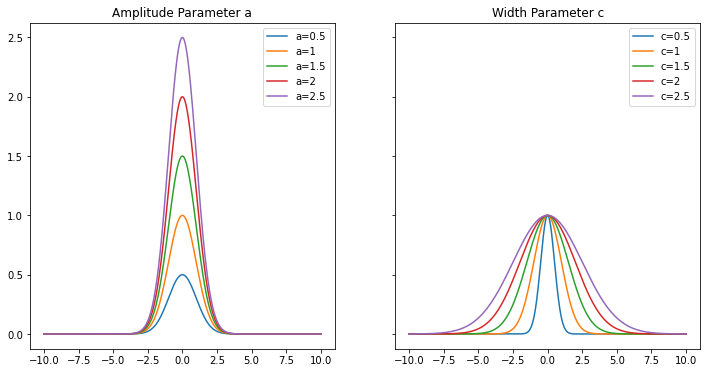

In [7]:
fig = plt.figure(figsize=(12,6))

axs = fig.subplots( 1,2, sharey=True)
ax = axs[0]
for a in [0.5, 1, 1.5, 2, 2.5]:
    ax.plot(x, gauss(x, a=a), label=f'a={a}')
ax.legend()
ax.set_title('Amplitude Parameter a')

ax =axs[1]
for c in [0.5, 1, 1.5, 2, 2.5]:
    ax.plot(x, gauss(x,c=c ), label=f'c={c}')
ax.legend()
ax.set_title('Width Parameter c')

## Full Width Half Maximum (FWHM)

$$ 
FWHM = 2\sqrt{2 ln 2}\ c \approx 2.35482\ c
$$
Formula above computes the width, we need the x-distance so half of that value.

(http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html)

Text(0.5, 1.0, 'Full Width, Half Maximum')

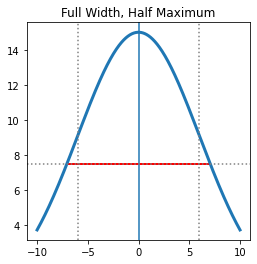

In [8]:
a=15
c= 6.0
#fwhm = 2.35482*c
fwhm = 1.18*c
mx = gauss(fwhm, a=a, c=c)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(x, gauss(x,a=a, c=c ), lw=3,label=f'c={c}')
ax.axvline(0)
ax.axhline(a*0.5, ls=':', color='grey')
ax.axvline(-c, ls=':', color='grey')
ax.axvline(c, ls=':', color='grey')
ax.hlines(y=mx, xmin=-fwhm, xmax=fwhm, lw=2, color='red')
ax.set_title('Full Width, Half Maximum')

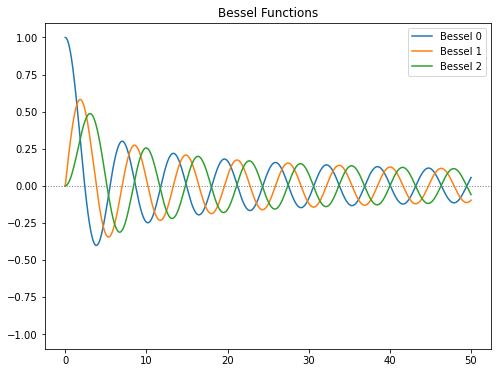

In [9]:
import scipy.special as sp

x = np.linspace(0, 50, 1500)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, sp.jv(0,x), label='Bessel 0')
ax.plot(x, sp.jv(1,x), label='Bessel 1')
ax.plot(x, sp.jv(2,x), label='Bessel 2')
ax.axhline(0, ls=':',lw=1, color='grey')
ax.set_ylim(-1.1, 1.1)
ax.set_title('Bessel Functions')
ax.legend()

Text(0.5, 1.0, '$I=I_0\\left(\\frac{2J_1(x)}{x}\\right)^2$')

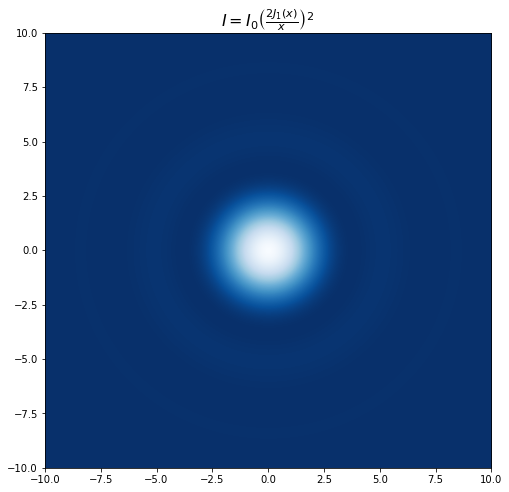

In [10]:
I0 = 888

x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

XX, YY = np.meshgrid(x,y)
dist = np.sqrt(XX**2+YY**2)
bessel = sp.jv(1, dist)

funcstr = r'$I=I_0\left(\frac{2J_1(x)}{x}\right)^2$'

#I=bessel
I = I0*np.power((2*bessel/(dist)),2)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.imshow(I, origin='lower', cmap=plt.cm.Blues_r,
           extent=[x.min(),x.max(),y.min(),y.max()], aspect='auto')
ax.set_title(funcstr,size=16)

In [11]:
I.min(),I.max()

(3.8005583621343584e-10, 887.8217023813987)

Text(0.5, 1.0, '$I=I_0\\left(\\frac{2J_1(x)}{x}\\right)^2$')

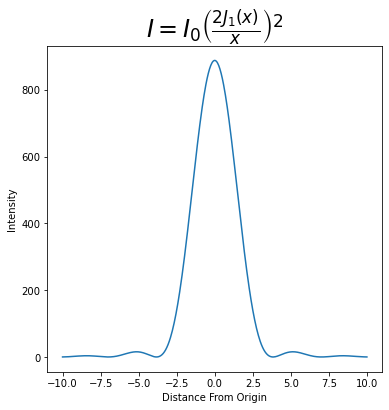

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(x,I[250])
ax.set_xlabel('Distance From Origin')
ax.set_ylabel('Intensity')
ax.set_title(funcstr,size=24)

# ax = fig.add_subplot(122)
# plt.plot(x, dist[250])
# ax.set_xlabel('Distance From Origin')
# ax.set_ylabel('Disntace (pixels)')

Text(0.5, 0.92, '$I=I_0\\left(\\frac{2J_1(x)}{x}\\right)^2$')

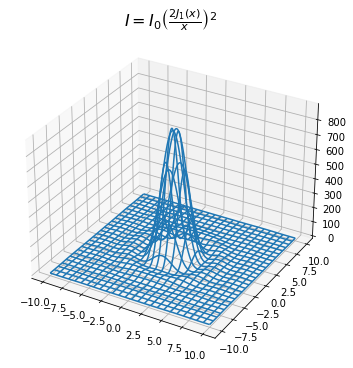

In [13]:
# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
ax.plot_wireframe(XX,YY, I, cstride=20, rstride=20)#, antialiased=False, cmap=plt.cm.gist_heat, vmin=0, vmax=3)
ax.set_title(funcstr,size=16)

Text(0.5, 1.0, '$I=I_0\\left(\\frac{2J_1(x)}{x}\\right)^2$')

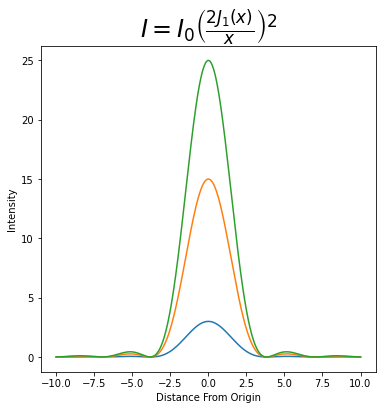

In [14]:
dist = x
bessel = sp.jv(1, dist)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(x,3.0*np.power((2*bessel/(dist)),2))
plt.plot(x,15.0*np.power((2*bessel/(dist)),2))
plt.plot(x,25.0*np.power((2*bessel/(dist)),2))
ax.set_xlabel('Distance From Origin')
ax.set_ylabel('Intensity')
ax.set_title(funcstr,size=24)

In [15]:
import os
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

import warnings
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS, FITSFixedWarning

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


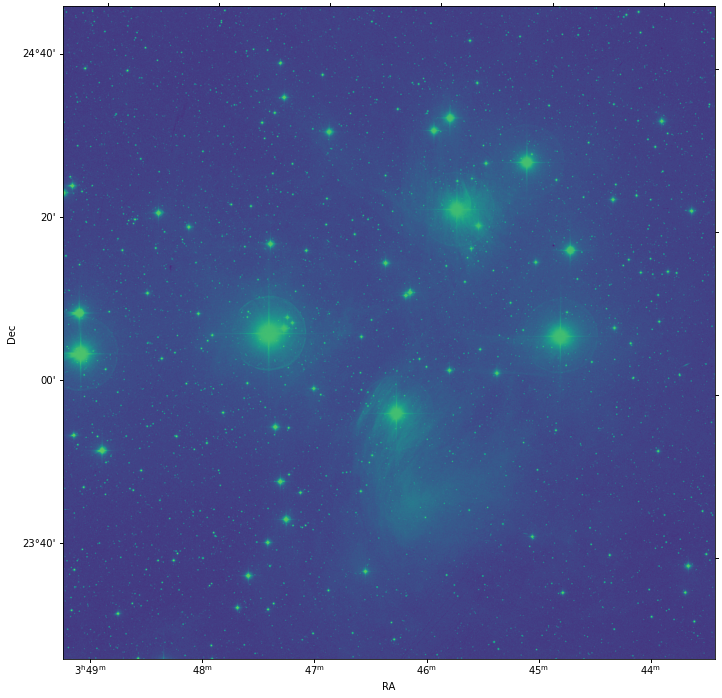

In [16]:
filename =os.path.join(os.path.dirname(os.getcwd()),'data/DSS_Pleiades_large.fits')

hdu = fits.open(filename)[0]
with warnings.catch_warnings():
    # Ignore a warning on using DATE-OBS in place of MJD-OBS
    warnings.filterwarnings('ignore', message="'datfix' made the change",
                            category=FITSFixedWarning)
    wcs = WCS(hdu.header)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')

In [17]:
from scipy.ndimage import find_objects, label, generate_binary_structure, maximum_filter, convolve

convd = convolve(hdu.data, np.ones((15,15))/225.0)
img_masked = convd > 10000
# convd = maximum_filter(hdu.data, size=(5,5))
# img_masked = convd > 13000
s = generate_binary_structure(2,2)
labeled_array, nfeatures = label(img_masked, structure=s)
print(f'Features found: {nfeatures}')
locs = find_objects(labeled_array)
areas = np.array([ (l[0].stop-l[0].start)*(l[1].stop-l[1].start) for l in locs])

Features found: 42


In [18]:
from scipy.ndimage import find_objects, label, generate_binary_structure, maximum_filter, convolve
from astropy.table import QTable

def img_find_objects(hdu, pcttile=99.0, min_size=80, mask_percent=0.5):
    n_pix_y, n_pix_x = hdu.data.shape
    # pick the mask size based on 0.5% of the x pixel len
    m_sz = int(n_pix_x*mask_percent/100.0)
    obj_minval = np.percentile(hdu.data, pcttile)

    #label the features
    convd = convolve(hdu.data, np.ones((m_sz, m_sz))/(m_sz**2))
    img_masked = convd >= obj_minval
    s = generate_binary_structure(2,2)
    labeled_array, nfeatures = label(img_masked, structure=s)

    #locate the features
    locs = find_objects(labeled_array)
    tbl = QTable({"xslice":[l[1] for l in locs],
                  "yslice":[l[0] for l in locs],
                  "area":  [ (l[0].stop-l[0].start)*(l[1].stop-l[1].start) for l in locs],
                  "pixcenterX": [ l[1].start+(l[1].stop-l[1].start)/2 for l in locs],
                  "pixcenterY": [ l[0].start+(l[0].stop-l[0].start)/2 for l in locs]})
    
    # sky coords:
    wcs = WCS(hdu.header)
    tbl['coord'] = wcs.pixel_to_world(tbl['pixcenterX'],tbl['pixcenterY']).icrs
    

    return tbl

In [19]:
loc_tbl = img_find_objects(hdu)
len(loc_tbl)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '30/11/51          ' to '1951-11-30''. [astropy.wcs.wcs]


48

In [20]:
loc_tbl[:10]

xslice,yslice,area,pixcenterX,pixcenterY,coord
,,,,,"deg,deg"
object,object,int32,float64,float64,object
"slice(323, 327, None)","slice(0, 1, None)",4,325.0,0.5,"57.14315593106666,23.434521423698396"
"slice(235, 239, None)","slice(194, 198, None)",16,237.0,196.0,"57.19116214351905,23.525673789258324"
"slice(750, 758, None)","slice(217, 225, None)",64,754.0,221.0,"56.925429422581,23.543970368769077"
"slice(793, 810, None)","slice(351, 368, None)",289,801.5,359.5,"56.90279192875907,23.609933103926203"
"slice(1302, 1314, None)","slice(372, 385, None)",156,1308.0,378.5,"56.6421540542891,23.62478910685056"
"slice(2699, 2710, None)","slice(396, 407, None)",121,2704.5,401.5,"55.922839714128116,23.64959409131638"
"slice(880, 892, None)","slice(497, 510, None)",156,886.0,503.5,"56.86114012440619,23.678932386235733"
"slice(2029, 2032, None)","slice(526, 530, None)",12,2030.5,528.0,"56.27154782131502,23.70302069254158"


In [21]:
import sys
sys.path.append(os.path.expanduser('~/repos/ReipurthBallyProject/src'))
sys.path.append(os.path.expanduser('~/repos/runawaysearch/src'))


In [22]:
from gaiastars import gaiastars as gs
import astropy.units as u

pleiades_cs = gs(name='Pleiades Consearch')
pleiades_cs.conesearch(56.567*u.degree, 24.192*u.degree, 2*u.degree)

INFO: Query finished. [astroquery.utils.tap.core]


In [23]:
cs_coords = pleiades_cs.get_coords()

In [24]:
matches = loc_tbl['coord'].search_around_sky(cs_coords,5*u.arcsecond)
matches

(array([ 3397,  3490,  5296,  5320,  8217,  8298,  8767,  8866,  8914,
         8991,  9066,  9095,  9115,  9265,  9914,  9956,  9982, 10004,
        10081, 11245, 11280, 11443, 11473, 11545, 11645, 11656, 11766,
        12273, 12281, 12445, 12494, 12538]),
 array([36, 44, 10, 11,  0,  1, 22,  2, 33, 31,  6,  4,  8, 39, 43, 42, 46,
        47, 45,  5,  7, 13, 12, 14, 16, 15, 27, 19, 20, 29, 37, 41]),
 <Angle [0.00100257, 0.00105169, 0.0012325 , 0.00077182, 0.00067435,
         0.00023319, 0.00062902, 0.00026127, 0.00102355, 0.00112065,
         0.00105866, 0.00104719, 0.00049244, 0.00087976, 0.0011069 ,
         0.00096968, 0.00094564, 0.00048476, 0.00097002, 0.00069726,
         0.00075703, 0.00086675, 0.00091962, 0.00078024, 0.00082958,
         0.00110335, 0.00064871, 0.0005901 , 0.00094326, 0.00087569,
         0.00089535, 0.0008475 ] deg>,
 <Quantity [1.74982068e-05, 1.83554437e-05, 2.15111471e-05, 1.34708036e-05,
            1.17696115e-05, 4.07001935e-06, 1.09784949e-05, 4.56001

In [25]:
2*u.arcsecond.to(u.degree)

0.0005555555555555556

In [26]:
match_i=22
loc_tbl['coord'][matches[1][match_i]], cs_coords[matches[0][match_i]]

(<SkyCoord (ICRS): (ra, dec) in deg
     (56.85112826, 23.91514436)>,
 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
     (56.85182143, 23.91447789, 138.48521591)
  (pm_ra_cosdec, pm_dec) in mas / yr
     (20.04910804, -44.13258985)>)

In [27]:
matches[2][match_i].to(u.degree)

<Angle 0.00091962 deg>

In [28]:
loc_tbl['coord'][matches[1][match_i]].separation(cs_coords[matches[0][match_i]]).to(u.arcsecond), matches[2][match_i].to(u.arcsecond)

(<Angle 3.31064199 arcsec>, <Angle 3.31064199 arcsec>)

In [29]:
cs_coords[2050]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (54.95085376, 23.53098416, 219.01014233)
 (pm_ra_cosdec, pm_dec) in mas / yr
    (-15.92494123, -11.37888824)>

In [30]:
loc_tbl['coord'][47].separation(cs_coords[2050])

<Angle 2.07599881 deg>

In [31]:
hdu.header

SIMPLE  =                    T /FITS header                                     
BITPIX  =                   16 /No.Bits per pixel                               
NAXIS   =                    2 /No.dimensions                                   
NAXIS1  =                 2825 /Length X axis                                   
NAXIS2  =                 2825 /Length Y axis                                   
EXTEND  =                    T /                                                
DATE    = '06/06/23          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'E441              ' /Observatory plate label                         
PLATEID = '070Q              ' /GSSS Plate ID                                   
REGION  = 'XE356             ' /GSSS Region Name                                
DATE-OBS= '30/11/51          ' /UT date of Observation                          
UT      = '06:39:00.00      

In [32]:
wcs.pixel_to_world(loc_tbl['pixcenterX'],loc_tbl['pixcenterY']).icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(57.14315593, 23.43452142), (57.19116214, 23.52567379),
     (56.92542942, 23.54397037), (56.90279193, 23.6099331 ),
     (56.64215405, 23.62478911), (55.92283971, 23.64959409),
     (56.86114012, 23.67893239), (56.27154782, 23.70302069),
     (56.82145821, 23.72708875), (56.83620461, 23.80422975),
     (57.23704285, 23.85803672), (57.30068085, 23.88733871),
     (56.85112826, 23.91514436), (56.58156672, 23.94900526),
     (56.76729205, 23.99571772), (56.35885928, 24.036037  ),
     (56.46468444, 24.03932897), (57.29242544, 24.05384541),
     (56.86414869, 24.10523432), (56.21868088, 24.11364386),
     (56.09803501, 24.13336655), (56.81901687, 24.1289508 ),
     (56.83069261, 24.13954911), (57.29863602, 24.13683001),
     (57.02948724, 24.14265018), (56.56093613, 24.1946412 ),
     (57.14476525, 24.18185618), (56.61350723, 24.25540664),
     (56.27676291, 24.26394966), (56.20042706, 24.2899758 ),
     (56.42165423, 24.28942251), (56.87213033, 24.

In [33]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 54.14744045833333  24.48501656111111  
CRPIX : 6159.399337061044  2128.5461110574015  
PC1_1 PC1_2  : 0.02528081156984964  -0.00015014380173799814  
PC2_1 PC2_2  : 0.00015044448309590926  0.025287195457691536  
CDELT : -0.018682250818302673  0.018682250818302673  
NAXIS : 2825  2825

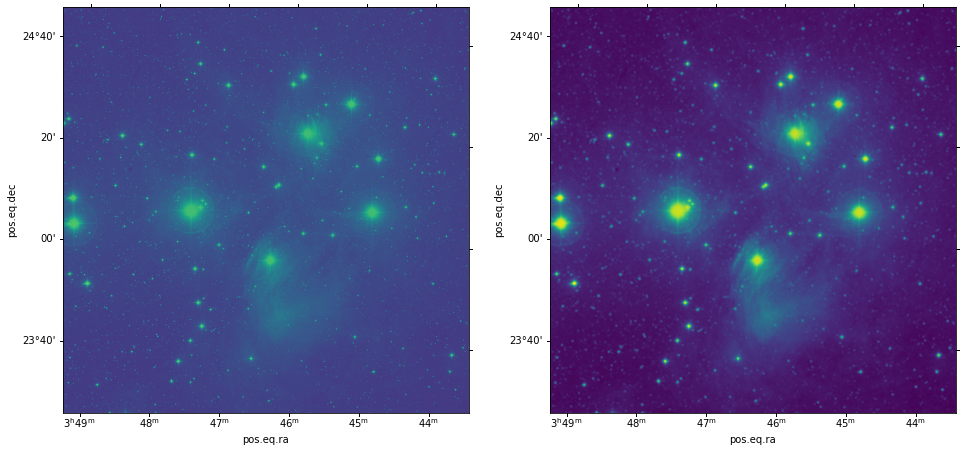

In [34]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(convd, origin='lower', cmap=plt.cm.viridis)

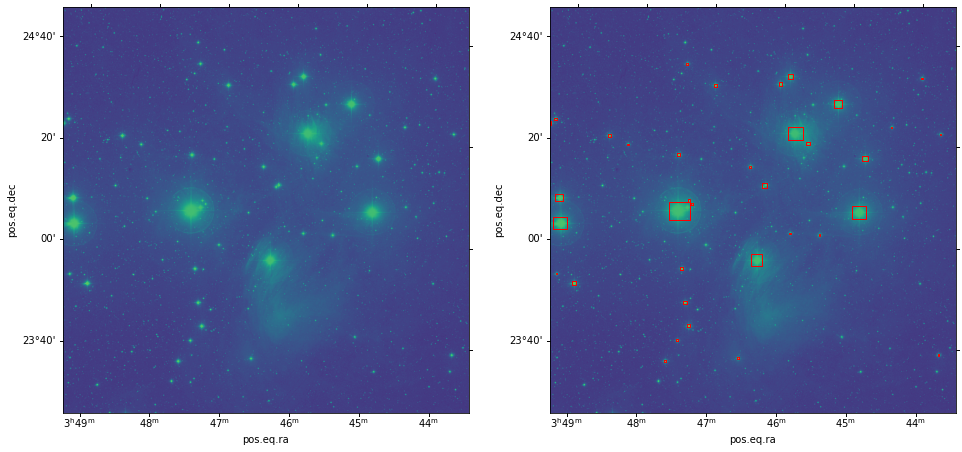

In [35]:
from  matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


rects = []
for idx in range(nfeatures):
    if areas[idx] <= 80:
        continue
    loc = locs[idx]
    xy = (loc[1].start, loc[0].start)
    width = loc[1].stop - loc[1].start
    height = loc[0].stop - loc[0].start
    rect = Rectangle(xy, width, height, color='red')
    rects.append(rect)

pc = PatchCollection(rects, facecolor='none', edgecolor='red')

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.add_collection(pc)

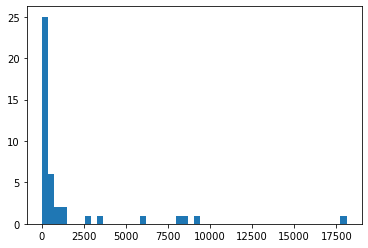

In [36]:
areas = np.array([ (l[0].stop-l[0].start)*(l[1].stop-l[1].start) for l in locs])
zz = plt.hist(areas, bins=50)

In [37]:
areas.argmax(), areas[areas.argmax()], areas.max(), locs[areas.argmax()]

(15, 18104, 18104, (slice(1345, 1469, None), slice(830, 976, None)))

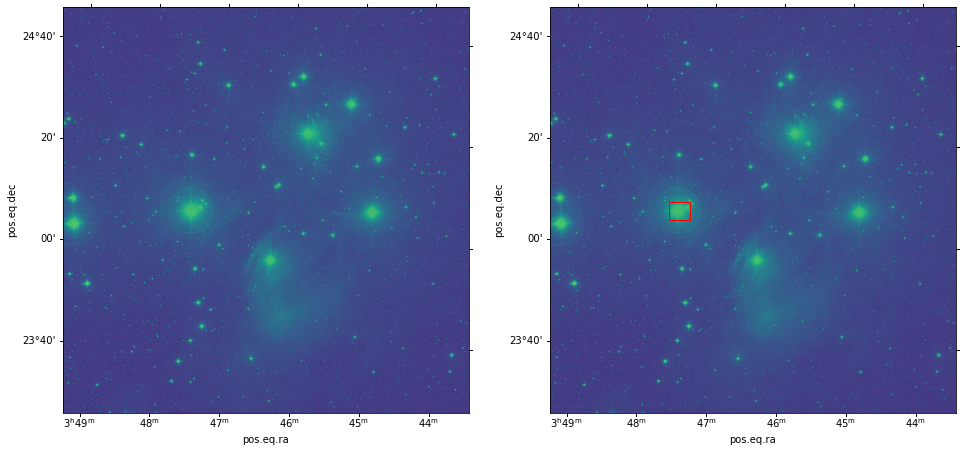

In [38]:
loc=locs[areas.argmax()]

xy = (loc[1].start, loc[0].start)
width = loc[1].stop - loc[1].start
height = loc[0].stop - loc[0].start
rect = Rectangle(xy, width, height, color='red', lw=3)


pc = PatchCollection([rect], facecolor='none', edgecolor='red')

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.add_collection(pc)

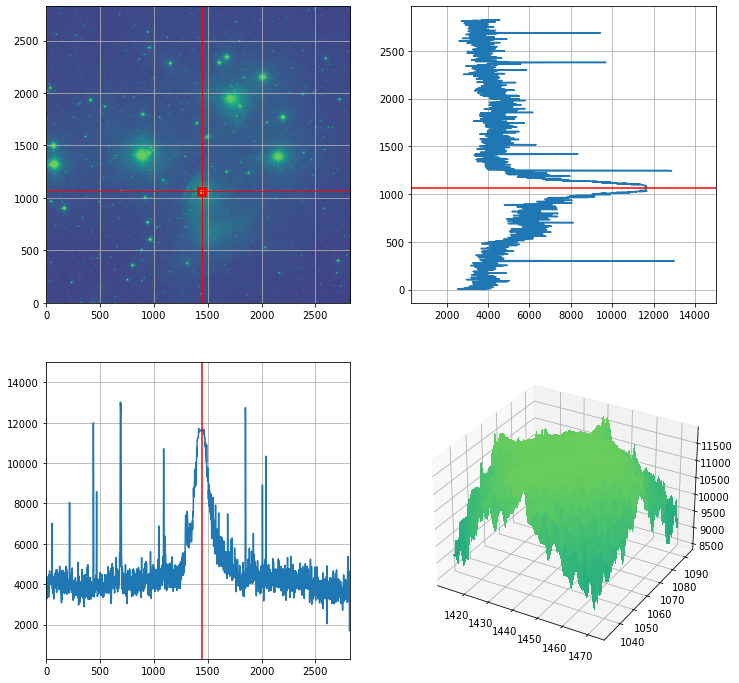

In [39]:
x_val = 1443.28; y_val = 1062.58

rownum=round(y_val); colnum = round(x_val)
bxsize=60
xy=(colnum-bxsize//2,rownum-bxsize//2); width=bxsize; height =bxsize
# loc_i = areas.argmax()
# loc = locs[loc_i]
# xy = (loc[1].start, loc[0].start)
# width = loc[1].stop - loc[1].start
# height = loc[0].stop - loc[0].start
# rownum = xy[1]+height//2
# colnum = xy[0]+width//2
fig = plt.figure(figsize=(12,12))

rect = Rectangle(xy, width, height, color='red', lw=3)

ax = fig.add_subplot(2,2,1)
ax.imshow(hdu.data, origin='lower', aspect='auto', cmap=plt.cm.viridis,vmin=300, vmax=15000)
ax.add_collection(PatchCollection([rect], facecolor='none', lw=3,edgecolor='red'))
ax.axhline(rownum, color='red', lw=1)
ax.axvline(colnum, color='red', lw=1)
ax.grid()

ax = fig.add_subplot(2,2,3)
ax.plot(hdu.data[rownum])
ax.set_xlim(0, hdu.data.shape[1])
ax.axvline(colnum, color='red')
ax.grid()
ax.set_ylim(300, 15000)

ax = fig.add_subplot(2,2,2)
ax.plot(hdu.data[:, colnum], np.arange(hdu.data.shape[1]))
# ax.set_ylim(0, hdu.data.shape[0])
ax.axhline(rownum, color='red')
ax.grid()
ax.set_xlim(300, 15000)

# create slice from rectangle
slc = (slice(xy[1],xy[1]+height), slice(xy[0], xy[0]+width))
y=np.arange(slc[0].start, slc[0].stop); x=np.arange(slc[1].start, slc[1].stop)
XX,YY = np.meshgrid(x,y)

ax = fig.add_subplot(2,2,4,projection="3d")
ax.plot_surface(XX,YY, hdu.data[slc], antialiased=False, cmap=plt.cm.viridis, vmin=300, vmax=15000)


In [43]:
def plot_obj(data, xy_val=None, obj=None, bxsize=60,vmin=300, vmax=15000, cmap=plt.cm.viridis):
    if xy_val is not None:
        x_val = xy_val[0]; y_val = xy_val[1]

        rownum=round(y_val); colnum = round(x_val)
        xy=(colnum-bxsize//2,rownum-bxsize//2); width=bxsize; height =bxsize
    elif obj is not None:
        loc = obj
        xy = (loc[1].start, loc[0].start)
        width = loc[1].stop - loc[1].start
        height = loc[0].stop - loc[0].start
        rownum = xy[1]+height//2
        colnum = xy[0]+width//2
    else:
        raise ValueError('one of xy_val or obj must be specified')
    
    fig = plt.figure(figsize=(12,12))

    rect = Rectangle(xy, width, height, color='red', lw=3)

    ax = fig.add_subplot(2,2,1)
    ax.imshow(data, origin='lower', aspect='auto', cmap=cmap,vmin=vmin, vmax=vmax)
    ax.add_collection(PatchCollection([rect], facecolor='none', lw=3,edgecolor='red'))
    ax.axhline(rownum, color='red', lw=1)
    ax.axvline(colnum, color='red', lw=1)
    ax.grid()

    ax = fig.add_subplot(2,2,3)
    ax.plot(data[rownum])
    ax.set_xlim(0, data.shape[1])
    ax.axvline(colnum, color='red')
    ax.grid()
    ax.set_ylim(300, 15000)

    ax = fig.add_subplot(2,2,2)
    ax.plot(data[:, colnum], np.arange(data.shape[1]))
    # ax.set_ylim(0, hdu.data.shape[0])
    ax.axhline(rownum, color='red')
    ax.grid()
    ax.set_xlim(300, 15000)

    # create slice from rectangle
    slc = (slice(xy[1],xy[1]+height), slice(xy[0], xy[0]+width))
    y=np.arange(slc[0].start, slc[0].stop); x=np.arange(slc[1].start, slc[1].stop)
    XX,YY = np.meshgrid(x,y)

    ax = fig.add_subplot(2,2,4,projection="3d")
    ax.plot_surface(XX,YY, data[slc], antialiased=False, cmap=cmap, vmin=vmin, vmax=vmax)

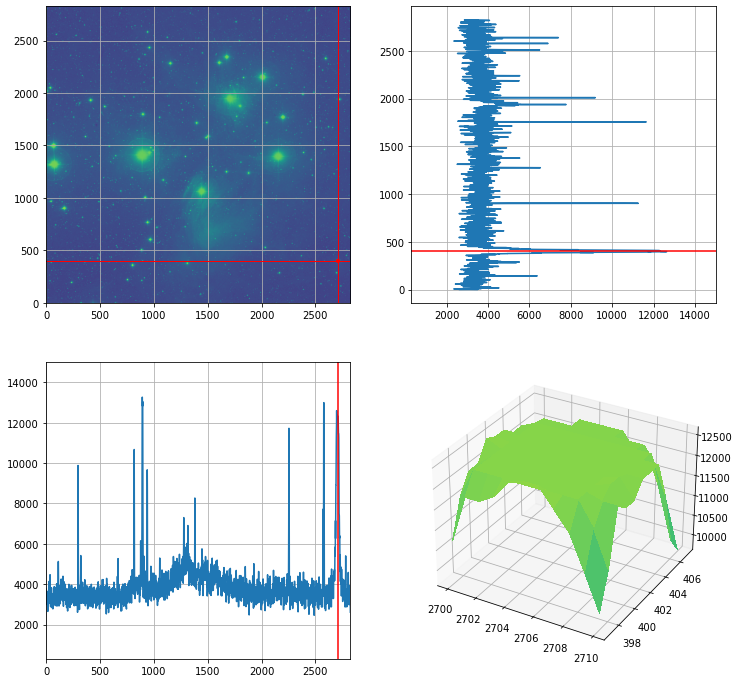

In [46]:
plot_obj(hdu.data,obj=locs[3])

In [190]:
from scipy.ndimage import maximum_position

maximum_position(hdu.data, labeled_array, 1)

(220, 757)

In [206]:
hdu.data[locs[0]]

array([[12739, 12739, 12643, 12643, 12643, 12643, 12312],
       [12739, 12739, 12643, 12643, 12643, 12643, 12753],
       [12739, 12739, 12643, 12643, 12643, 12643, 12753],
       [12739, 12739, 12670, 12670, 12670, 12670, 12670],
       [12739, 12739, 12670, 12670, 12670, 12670, 12670],
       [12739, 12739, 12670, 12670, 12670, 12670, 12670]], dtype=int16)

In [207]:
from scipy.ndimage import mean as ndmean
ndmean(hdu.data, labeled_array, np.arange(0, len(locs)))

array([ 4191.72825113, 12679.28571429, 12233.84579439, 12281.03305785,
       12322.04395604, 12495.20720721, 11883.29971182, 11919.08561644,
       11853.98684211, 12638.57142857, 12070.        , 11045.15927218,
       12276.94642857, 12033.768     , 12121.96153846, 11297.21788129,
       11046.00384478, 11005.10914509, 11643.84297521, 11441.58959538,
       11512.62477341, 11432.42066421, 11969.14438503, 12052.        ,
       11440.95665323, 11918.30769231, 11772.42168675, 10978.79724409,
       12458.37974684, 10848.19636186, 11965.08474576, 12263.10294118,
       12181.55555556, 11811.5625    , 12332.5       , 11194.84365782,
       12065.375     , 11757.32142857, 11456.45930233, 12206.25263158,
       11405.0258427 , 12322.03053435])

In [49]:
hdu.header

SIMPLE  =                    T /FITS header                                     
BITPIX  =                   16 /No.Bits per pixel                               
NAXIS   =                    2 /No.dimensions                                   
NAXIS1  =                 2825 /Length X axis                                   
NAXIS2  =                 2825 /Length Y axis                                   
EXTEND  =                    T /                                                
DATE    = '06/06/23          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'E441              ' /Observatory plate label                         
PLATEID = '070Q              ' /GSSS Plate ID                                   
REGION  = 'XE356             ' /GSSS Region Name                                
DATE-OBS= '30/11/51          ' /UT date of Observation                          
UT      = '06:39:00.00      